In [1]:
#Importing the packages

import torch
import torch.optim as optim
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Defining the Hyperparameters

input_size = 1
output_size = 1
num_epochs = 10000
learning_rate = 0.001

In [3]:
# Defining a Toy Dataset

x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],[9.779], [6.182], [7.59], [2.167], [7.042], [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], [3.366], [2.596], [2.53], [1.221], [2.827], [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [4]:
# Linear Regression Model

model = nn.Linear(input_size, output_size)

# Loss Function:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [5]:
# Training the Model

for epoch in range(num_epochs):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)
    
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 1000 == 0:
        print("Epoch: {}/{}; \tLoss: {}".format(epoch + 1, num_epochs, loss.item()))

Epoch: 1000/10000; 	Loss: 0.35465386509895325
Epoch: 2000/10000; 	Loss: 0.2800377905368805
Epoch: 3000/10000; 	Loss: 0.23539696633815765
Epoch: 4000/10000; 	Loss: 0.20868952572345734
Epoch: 5000/10000; 	Loss: 0.19271118938922882
Epoch: 6000/10000; 	Loss: 0.1831517517566681
Epoch: 7000/10000; 	Loss: 0.1774325966835022
Epoch: 8000/10000; 	Loss: 0.1740109771490097
Epoch: 9000/10000; 	Loss: 0.1719639003276825
Epoch: 10000/10000; 	Loss: 0.17073921859264374


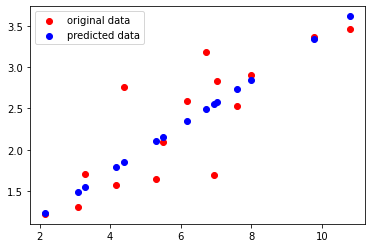

In [6]:
# Plotting the outputs

predicted = model(torch.from_numpy(x_train)).detach().numpy()

plt.scatter(x_train, y_train, label='original data', color='r')
plt.scatter(x_train, predicted, label='predicted data', color='b')
plt.legend()
plt.show()

In [7]:
# Logistic Regression Model

import torchvision
import torchvision.transforms as transforms

In [8]:
# Defining Hyperparameters

input_size = 784
num_classes = 10
num_epochs = 20
batch_size = 100
learning_rate = 0.001

In [9]:
# loding the Dataset

train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train = False, transform=transforms.ToTensor(), download=True)

C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


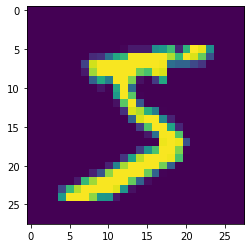

In [10]:
plt.imshow(train_dataset.train_data[0])
plt.show()

In [11]:
# Create DataLoader objects

trainloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [12]:
model = nn.Linear(input_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [13]:
# Training the Model

total_step = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(trainloader):
        images = images.reshape(-1, 28 * 28)
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()
        
        if (i + 1) % 200 == 0:
            print("Epoch: {}/{}, \tIteration: {}/{}, \tLoss: {}".format(epoch + 1, num_epochs, i + 1, len(trainloader), loss.item()))

Epoch: 1/20, 	Iteration: 200/600, 	Loss: 2.11348295211792
Epoch: 1/20, 	Iteration: 400/600, 	Loss: 1.9768154621124268
Epoch: 1/20, 	Iteration: 600/600, 	Loss: 1.8140112161636353
Epoch: 2/20, 	Iteration: 200/600, 	Loss: 1.6307744979858398
Epoch: 2/20, 	Iteration: 400/600, 	Loss: 1.5595742464065552
Epoch: 2/20, 	Iteration: 600/600, 	Loss: 1.416924238204956
Epoch: 3/20, 	Iteration: 200/600, 	Loss: 1.4517042636871338
Epoch: 3/20, 	Iteration: 400/600, 	Loss: 1.373637080192566
Epoch: 3/20, 	Iteration: 600/600, 	Loss: 1.3432384729385376
Epoch: 4/20, 	Iteration: 200/600, 	Loss: 1.187993049621582
Epoch: 4/20, 	Iteration: 400/600, 	Loss: 1.15120267868042
Epoch: 4/20, 	Iteration: 600/600, 	Loss: 1.287697196006775
Epoch: 5/20, 	Iteration: 200/600, 	Loss: 1.023123860359192
Epoch: 5/20, 	Iteration: 400/600, 	Loss: 1.0275392532348633
Epoch: 5/20, 	Iteration: 600/600, 	Loss: 0.9594303369522095
Epoch: 6/20, 	Iteration: 200/600, 	Loss: 1.0727664232254028
Epoch: 6/20, 	Iteration: 400/600, 	Loss: 1.049628

In [14]:
# Testing the model

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
        images = images.reshape(-1, 28 * 28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum()
        total += labels.size(0)
    print("Accuracy of the model: {}".format(float(correct) / float(total)))

Accuracy of the model: 0.8650666666666667
